# Introduction

## Background

A Superstore Chain Company is looking to recruit data scientists. They are interested in analyzing the sales and customer behavior of their company. The company has collected data on their customers, their purchase behavior, and their marketing campaigns. The company wants to use this data to better understand their customers and their sales performance.

## Problem Statement

The company wants to optimize sales performance and profitability by understanding key factors that influence customer purchasing behavior. This includes analyzing which customer segments generate the most revenue, and which products perform best.

## Objectives

As a data analyst, we will attempt to answer the following questions:

1. Find out which product category is the best-selling.
2. Find out which customer segment generates the most revenue.
3. What are the key drivers of sales performance in the superstore?
4. How do customer behavior patterns vary across the different customer segments?

# Data Understanding and Preparation

## Import Libraries

In [301]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime

from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

## Import Dataset

In [302]:
df = pd.read_csv('supermarket_customers.csv', delimiter='\t')

display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## Data Dictionary

People  
- `ID` : Customer's unique identifier  
- `Year_Birth` : Customer's birth year  
- `Education` : Customer's education level  
- `Marital_Status` : Customer's marital status  
- `Income` : Customer's yearly household income  
- `Kidhome` : Number of children in customer's household  
- `Teenhome` : Number of teenagers in customer's household  
- `Dt_Customer` : Date of customer's enrollment with the company  
- `Recency` : Number of days since customer's last purchase  
- `Complain` : 1 if the customer complained in the last 2 years, 0 otherwise  

Products  
- `MntWines` : Amount spent on wine in last 2 years  
- `MntFruits` : Amount spent on fruits in last 2 years  
- `MntMeatProducts` : Amount spent on meat in last 2 years  
- `MntFishProducts` : Amount spent on fish in last 2 years  
- `MntSweetProducts` : Amount spent on sweets in last 2 years  
- `MntGoldProds` : Amount spent on gold in last 2 years  

Promotion 
- `NumDealsPurchases` : Number of purchases made with a discount  
- `AcceptedCmp1` : 1 if the customer accepted the offer in the 1st campaign, 0 otherwise  
- `AcceptedCmp2` : 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise  
- `AcceptedCmp3` : 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise  
- `AcceptedCmp4` : 1 if the customer accepted the offer in the 4th campaign, 0 otherwise  
- `AcceptedCmp5` : 1 if the customer accepted the offer in the 5th campaign, 0 otherwise  
- `Response` : 1 if the customer accepted the offer in the last campaign, 0 otherwise  

Place  
- `NumWebPurchases` : Number of purchases made through the company’s website  
- `NumCatalogPurchases` : Number of purchases made using a catalog  
- `NumStorePurchases` : Number of purchases made directly in stores  
- `NumWebVisitsMonth` : Number of visits to the company’s website in the last month

## Data Understanding

In [303]:
print(f'The dataset consists of {df.shape[0]} rows and {df.shape[1]} columns \n')
df.info()

The dataset consists of 2240 rows and 29 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   

In [304]:
display(df.describe(include=[np.number], ).drop(columns='ID').style.format('{:.0f}'),
        df.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240,2216,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
mean,1969,52247,0,1,49,304,26,167,38,27,44,2,4,3,6,5,0,0,0,0,0,0,3,11,0
std,12,25173,1,1,29,337,40,226,55,41,52,2,3,3,3,2,0,0,0,0,0,0,0,0,0
min,1893,1730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,11,0
25%,1959,35303,0,0,24,24,1,16,3,1,9,1,2,0,3,3,0,0,0,0,0,0,3,11,0
50%,1970,51382,0,0,49,174,8,67,12,8,24,2,4,2,5,6,0,0,0,0,0,0,3,11,0
75%,1977,68522,1,1,74,504,33,232,50,33,56,3,6,4,8,7,0,0,0,0,0,0,3,11,0
max,1996,666666,2,2,99,1493,199,1725,259,263,362,15,27,28,13,20,1,1,1,1,1,1,3,11,1


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [305]:
colUniqueVals = []
for col in df.columns :
    colUniqueVals.append( [col,
                      df[col].nunique(),
                      df[col].unique()])

colUnique = pd.DataFrame(columns=['Column', 'Unique Value', 'Unique Sample'],
                          data=colUniqueVals)
colUnique

,Column,Unique Value,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 

## Data Cleaning and Preprocessing

### Missing Values

In [306]:
colMissingVals = []
for col in df.columns:
    colMissingVals.append([
        col,
        df[col].isna().sum(),
        round(df[col].isna().sum() / df.shape[0] * 100, 1)
    ])

colMissing = pd.DataFrame(colMissingVals, columns=['Column', 'Missing Values', 'Percentage'])
colMissing

,Column,Missing Values,Percentage
0,ID,0,0.0
1,Year_Birth,0,0.0
2,Education,0,0.0
3,Marital_Status,0,0.0
4,Income,24,1.1
5,Kidhome,0,0.0
6,Teenhome,0,0.0
7,Dt_Customer,0,0.0
8,Recency,0,0.0
9,MntWines,0,0.0


Since the `Income` column has 24 missing values (~1.1%), which is still a relatively small amount, we will be dropping the rows with missing values.

In [307]:
df.dropna(inplace=True)
print(f'After removing missing values, the dataset consists of {df.shape[0]} rows and {df.shape[1]} columns \n')

After removing missing values, the dataset consists of 2216 rows and 29 columns 



### Duplicates

In [308]:
print(f'Count of duplicated rows in the dataset: {df.duplicated().sum()}')

Count of duplicated rows in the dataset: 0


There are no duplicates in the dataset, which means there is less chances of data corruption.

### Outlier Detection

In [309]:
print('Description of Income :')
df['Income'].describe().apply(lambda x: round(x))

Description of Income :


count      2216
mean      52247
std       25173
min        1730
25%       35303
50%       51382
75%       68522
max      666666
Name: Income, dtype: int64

H0 : The data follows a normal distribution.

H1 : The data does not follow a normal distribution.

Statistic: 2943.373569541277, P-value: 0.0
Reject H0. The data is not normally distributed.


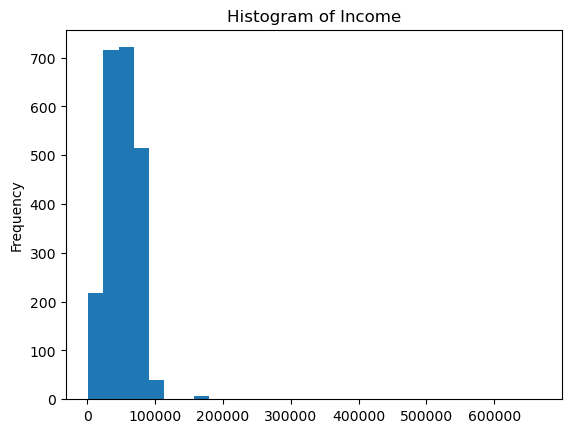

In [310]:
data = df['Income'].dropna()
statistic, p_value = normaltest(data)
print(f'Statistic: {statistic}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H0. The data is not normally distributed.')
else:
    print('Fail to reject H0. The data appears to be normally distributed.')

df['Income'].plot(kind='hist', bins=30)
plt.title('Histogram of Income')
plt.show()

As shown above, the `income` column does not appear to be normally distributed and is heavily skewed to the right. However, this does not always mean that the data is abnormal. We first need to check for outliers

In [311]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Statistics of Income: \n')
print(f'Lower bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f"There are {df[df['Income'] < lower_bound].shape[0]} outliers within the lower bound")
print(f"There are {df[df['Income'] > upper_bound].shape[0]} outliers within the upper bound")

Statistics of Income: 

Lower bound: -14525.5
Upper Bound: 118350.5
There are 0 outliers within the lower bound
There are 8 outliers within the upper bound


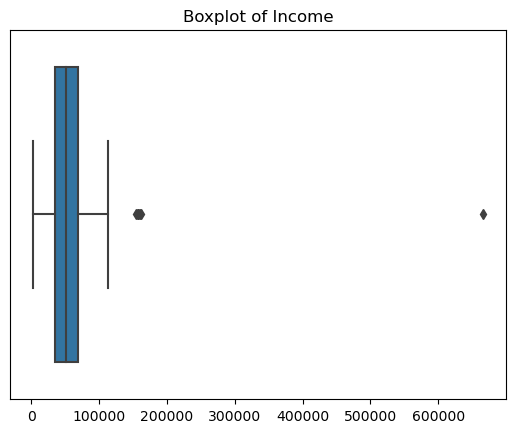

In [312]:
sns.boxplot(df['Income'], orient='h')
plt.title('Boxplot of Income')
plt.yticks([])
plt.show()

In [313]:
df[df['Income'] > upper_bound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


Drop the extreme outliers

In [314]:
df = df[df['Income'] < 6e5]

As seen above, due to the 8 outliers in the `income` column, the data seemed to be heavily right skewed. After checking the 8 outliers, it seems that there is only one extreme outlier. We can assume that this outlier is an error and should be dropped. As for the remaining 7 outliers, although they are above the upper bound, they are not considered extreme and we can assume that those 7 people are wealthier than the rest. Thus, we have decided that they will not be dropped.

### Data Transformation

Change `Dt_Customer` to datetime

In [315]:
# Change the date format to DD-MM-YYYY
df['Dt_Customer'] = df['Dt_Customer'].apply([pd.to_datetime])

print('Description of Dt_Customer :')
df['Dt_Customer'].describe()

Description of Dt_Customer :


count                    2215
unique                    662
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [316]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

Change the category of `Education` to either `Post Graduate` or `Under Graduate`

In [317]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [318]:
df['Education'].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], 'Postgraduate', inplace=True)
df['Education'].replace('Basic', 'Undergraduate', inplace=True)
df['Education'] = df['Education'].astype('category')
df['Education'].unique()


['Postgraduate', 'Undergraduate']
Categories (2, object): ['Postgraduate', 'Undergraduate']

Change the category of `Marital_Status` to either `Single` or `Relationship`

In [319]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [320]:
df['Marital_Status'].replace(['Together', 'Married'], 'Relationship', inplace=True)
df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single', inplace=True)
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Marital_Status'].unique()

['Single', 'Relationship']
Categories (2, object): ['Relationship', 'Single']

### Feature Selection

Drop `Z_CostContact` and `Z_Revenue`

In [321]:
df.drop(['Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

We have decided to drop the columns `Z_CostContact` and `Z_Revenue` because the values are all uniform. this means that it will not be of any use for the analysis. therefore, we will be dropping those two columns.

### Feature Engineering

- Create new column `totalMnt`
- Create new column `Age`
- Create new column `Kids`
- Create new column `DaysSinceJoined`
- Create new column `Frequency`

In [322]:
df['totalMnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

print('Description of totalMnt :')
df['totalMnt'].describe().apply(lambda x: f'{x:.0f}')

Description of totalMnt :


count    2215
mean      607
std       603
min         5
25%        69
50%       397
75%      1048
max      2525
Name: totalMnt, dtype: object

the feature `totalMnt` must be created in order to know how much each customer actually spends as a whole, instead of just on a single category of products.

In [323]:
latest_year = df['Dt_Customer'].max().year
latest_year

2014

the code above is used to get the latest year of the data. this used to calculate the age of each customer. this makes the analysis more accurate, as the data might not always be used during the same year that the data was collected.

In [324]:
df['Age'] = latest_year - df['Year_Birth']
df[['Age','Year_Birth']].sample(5)

print('Description of Age :')
display(df['Age'].describe().apply(lambda x: f'{x:.0f}'))

Description of Age :


count    2215
mean       45
std        12
min        18
25%        37
50%        44
75%        55
max       121
Name: Age, dtype: object

In [325]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
print('Description of Kids :')
display(df['Kids'].describe().apply(lambda x: f'{x:.0f}'))

Description of Kids :


count    2215
mean        1
std         1
min         0
25%         0
50%         1
75%         1
max         3
Name: Kids, dtype: object

the feature `Kids` must be created in order to know how many children each customer has. Instead of separating it into two features, it is more meaningful to know how many kids the customer has in total. however, this doesnt mean that knowing how many infants and teenagers the customer has is not important. because having the option of knowing how many of the total are infants or teenagers, opens up more opportunities for different analyses.

In [326]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
print('Description of TotalAcceptedCmp :')
df['TotalAcceptedCmp'].describe().apply(lambda x: f'{x:.0f}')

Description of TotalAcceptedCmp :


count    2215
mean        0
std         1
min         0
25%         0
50%         0
75%         1
max         5
Name: TotalAcceptedCmp, dtype: object

the feature `TotalAcceptedCmp` must be created in order to know how many times each customer has accepted a campaign. this is important because this feature is used to calculate the acceptance rate of each customer.

In [327]:
df['DaysSinceJoined'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days + 1
print('Description of DaysSinceJoined :')
df['DaysSinceJoined'].describe().apply(lambda x: f'{x:.0f}')


Description of DaysSinceJoined :


count    2215
mean      513
std       232
min         1
25%       341
50%       514
75%       687
max      1064
Name: DaysSinceJoined, dtype: object

the feature `DaysSinceJoined` is created in order to know how many days each customer has been a customer. This is important because this feature is used to calculate the Length of Customer Lifespan, which is needed in the LRFM analysis.

In [328]:
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + 1

print('Description of Frequency :')
df['Frequency'].describe().apply(lambda x: f'{x:.0f}')

Description of Frequency :


count    2215
mean       14
std         7
min         1
25%         7
50%        13
75%        19
max        33
Name: Frequency, dtype: object

the feature `Frequency` must be created in order to know how many times each customer has made a purchase. this is important because this feature is used to calculate the frequency of each customer as part of the LRFM analysis.

### Reorder and Rename Columns

In [329]:
display(df.head(1))
display(df.columns)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,totalMnt,Age,Kids,TotalAcceptedCmp,DaysSinceJoined,Frequency
0,5524,1957,Postgraduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,57,0,1,972,23


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'totalMnt', 'Age', 'Kids',
       'TotalAcceptedCmp', 'DaysSinceJoined', 'Frequency'],
      dtype='object')

In [330]:
df.rename(columns={
    'ID': 'customer_id',
    'Year_Birth': 'year_of_birth',
    'Education': 'education',
    'Marital_Status': 'marital_status',
    'Income': 'income',
    'Kidhome': 'num_kids',
    'Teenhome': 'num_teens',
    'Dt_Customer': 'date_joined',
    'Recency': 'days_since_last_purchase',
    'MntWines': 'mnt_wines',
    'MntFruits': 'mnt_fruits',
    'MntMeatProducts': 'mnt_meat_products',
    'MntFishProducts': 'mnt_fish_products',
    'MntSweetProducts': 'mnt_sweet_products',
    'MntGoldProds': 'mnt_gold_products',
    'NumDealsPurchases': 'num_deal_purchases',
    'NumWebPurchases': 'num_web_purchases',
    'NumCatalogPurchases': 'num_catalog_purchases',
    'NumStorePurchases': 'num_store_purchases',
    'NumWebVisitsMonth': 'num_web_visits_month',
    'AcceptedCmp1': 'accepted_cmp_1',
    'AcceptedCmp2': 'accepted_cmp_2',
    'AcceptedCmp3': 'accepted_cmp_3',
    'AcceptedCmp4': 'accepted_cmp_4',
    'AcceptedCmp5': 'accepted_cmp_5',
    'Complain': 'complained',
    'Response': 'accepted_cmp_6',
    'totalMnt': 'total_spent',
    'Age': 'age',
    'Kids': 'total_kids',
    'TotalAcceptedCmp': 'total_accepted_cmp',
    'DaysSinceJoined': 'days_since_joined',
    'Frequency': 'purchase_frequency'
}, inplace=True)

df.head(1)

,customer_id,year_of_birth,education,marital_status,income,num_kids,num_teens,date_joined,days_since_last_purchase,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,num_deal_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_1,accepted_cmp_2,complained,accepted_cmp_6,total_spent,age,total_kids,total_accepted_cmp,days_since_joined,purchase_frequency
0,5524,1957,Postgraduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,57,0,1,972,23


In [331]:
new_order = [
    'customer_id', 'year_of_birth', 'age', 'education', 'marital_status',
    'income', 'num_kids', 'num_teens', 'total_kids',
    'date_joined', 'days_since_joined', 'days_since_last_purchase',
    'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products',
    'mnt_sweet_products', 'mnt_gold_products', 'total_spent',
    'num_deal_purchases', 'num_web_purchases', 'num_catalog_purchases',
    'num_store_purchases', 'num_web_visits_month', 'purchase_frequency',
    'accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3', 'accepted_cmp_4', 'accepted_cmp_5',
    'accepted_cmp_6','total_accepted_cmp',  'complained'
]

df = df[new_order]

df.head(1)

,customer_id,year_of_birth,age,education,marital_status,income,num_kids,num_teens,total_kids,date_joined,days_since_joined,days_since_last_purchase,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,total_spent,num_deal_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,purchase_frequency,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_6,total_accepted_cmp,complained
0,5524,1957,57,Postgraduate,Single,58138.0,0,0,0,2012-04-09,972,58,635,88,546,172,88,88,1617,3,8,10,4,7,23,0,0,0,0,0,1,1,0


Renaming and reordering the columns helps to make the dataset more readable and easier to understand.

# LRFM Analysis

## Create LRFM Features

### Length and Recency

In [332]:
analysis_date = df['date_joined'].max() + datetime.timedelta(1)
analysis_date

Timestamp('2014-12-07 00:00:00')

The analysis date is set to the maximum date in the dataset plus one day. this is used to calculate the length and recency of each customer as part of the LRFM analysis.

In [333]:
df_length_recency = df.groupby('customer_id').agg(
    length=('date_joined', lambda x: (analysis_date - x.min()).days),
    recency=('date_joined', lambda x: (analysis_date - x.max()).days),
)

df_length_recency.sample(5, random_state=42)

,length,recency
customer_id,,
7300,161,161
7030,617,617
2936,604,604
7527,746,746
6119,428,428


### Frequency

In [334]:
df_frequency = df.groupby('customer_id').agg(
    frequency=('purchase_frequency', lambda x: x.sum())
)

df_frequency.sample(5, random_state=42)

,frequency
customer_id,
7300,17
7030,33
2936,5
7527,7
6119,4


### Monetary

In [335]:
df_monetary = df.groupby('customer_id').agg(
    monetary=('total_spent', 'sum'),
)

df_monetary.sample(5, random_state=42)

,monetary
customer_id,
7300,535
7030,1485
2936,23
7527,76
6119,17


In [336]:
df_customer = df.groupby('customer_id').agg(
    length=('date_joined', lambda x: (analysis_date - x.min()).days),
    recency=('date_joined', lambda x: (analysis_date - x.max()).days),
    frequency=('purchase_frequency', lambda x: x.sum()),    
    monetary=('total_spent', 'sum'),
)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary
customer_id,,,,
7300,161,161,17,535
7030,617,617,33,1485
2936,604,604,5,23
7527,746,746,7,76
6119,428,428,4,17


## Assign Scores

### Length Segmentation

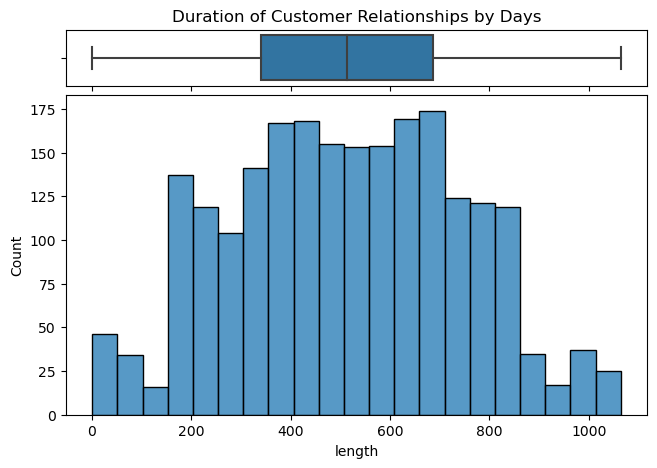

0.00       1.0
0.25     341.0
0.50     514.0
0.75     687.0
1.00    1064.0
Name: length, dtype: float64

In [337]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='length', ax=ax_top)
sns.histplot(data=df_customer, x='length', ax=ax_bot)

ax_top.set(
    title='Duration of Customer Relationships by Days'
)

plt.show()
display(df_customer['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [338]:
df_customer['l_score'] = pd.qcut(
    df_customer['length'],              
    q=4,                                
    labels=[1, 2, 3, 4]                 
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score
customer_id,,,,,
7300,161,161,17,535,1
7030,617,617,33,1485,3
2936,604,604,5,23,3
7527,746,746,7,76,4
6119,428,428,4,17,2


### Recency Segementation

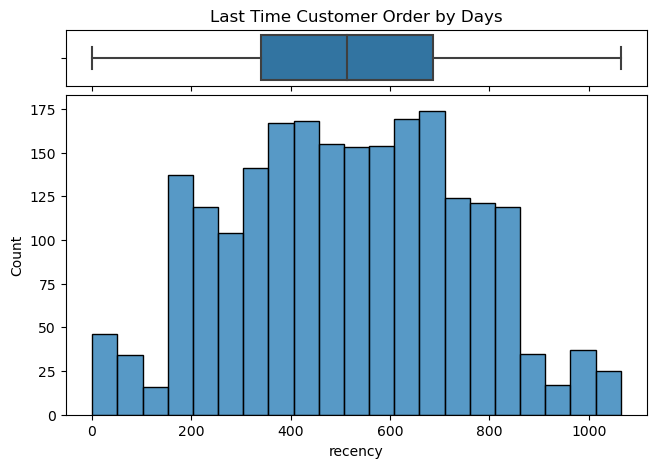

0.00       1.0
0.25     341.0
0.50     514.0
0.75     687.0
1.00    1064.0
Name: recency, dtype: float64

In [339]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='recency', ax=ax_top)
sns.histplot(data=df_customer, x='recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [340]:
df_customer['r_score'] = pd.qcut(
    df_customer['recency'],             
    q=4,                                
    labels=[4, 3, 2, 1]                 
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score
customer_id,,,,,,
7300,161,161,17,535,1,4
7030,617,617,33,1485,3,2
2936,604,604,5,23,3,2
7527,746,746,7,76,4,1
6119,428,428,4,17,2,3


### Frequency Segmentation

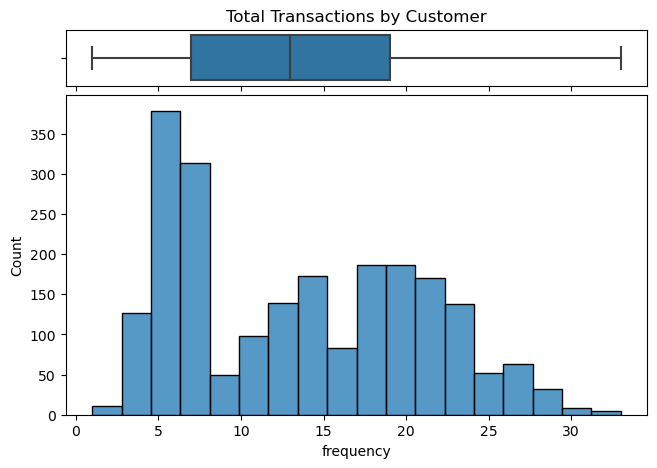

0.00     1.0
0.25     7.0
0.50    13.0
0.75    19.0
1.00    33.0
Name: frequency, dtype: float64

In [341]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='frequency', ax=ax_top)
sns.histplot(data=df_customer, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [342]:
df_customer['f_score'] = pd.qcut(
    df_customer['frequency'],             
    q=4,                                
    labels=[4, 3, 2, 1]                 
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score
customer_id,,,,,,,
7300,161,161,17,535,1,4,2
7030,617,617,33,1485,3,2,1
2936,604,604,5,23,3,2,4
7527,746,746,7,76,4,1,4
6119,428,428,4,17,2,3,4


### Monetary Segmentation

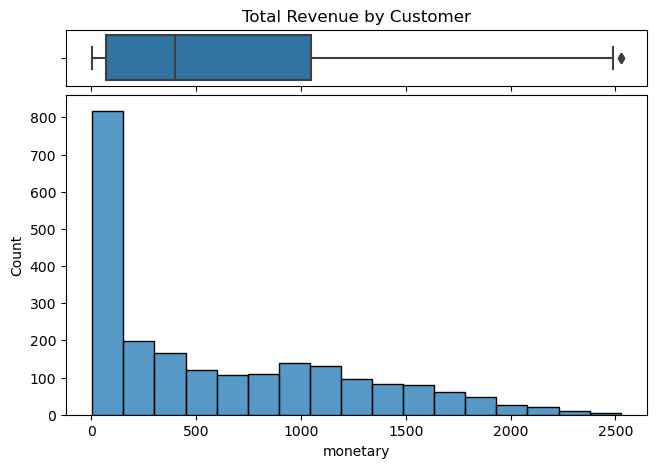

0.00       5.0
0.25      69.0
0.50     397.0
0.75    1048.0
1.00    2525.0
Name: monetary, dtype: float64

In [343]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='monetary', ax=ax_top)
sns.histplot(data=df_customer, x='monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()
display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [344]:
df_customer['m_score'] = pd.qcut(
    df_customer['monetary'],            
    q=4,                                
    labels=[1, 2, 3, 4]                 
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
customer_id,,,,,,,,
7300,161,161,17,535,1,4,2,3
7030,617,617,33,1485,3,2,1,4
2936,604,604,5,23,3,2,4,1
7527,746,746,7,76,4,1,4,2
6119,428,428,4,17,2,3,4,1


## Label Segments

In order to label the LRFM segments, we will follow the approach of combining the individual scores.

In [345]:
df_customer['lrfm_score_combined'] = df_customer['l_score'].astype(str) + df_customer['r_score'].astype(str) + df_customer['f_score'].astype(str) + df_customer['m_score'].astype(str)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined
customer_id,,,,,,,,,
7300,161,161,17,535,1,4,2,3,1423
7030,617,617,33,1485,3,2,1,4,3214
2936,604,604,5,23,3,2,4,1,3241
7527,746,746,7,76,4,1,4,2,4142
6119,428,428,4,17,2,3,4,1,2341


In [346]:
seg_map = {
    r'[1-2][1-4][1-4][1-2]': 'New Customers - Low Engagement and Value',
    r'[1-2][1-4][1-4][3-4]': 'New Customers - High Engagement and Value',
    r'[3-4][1-2][1-2][1-2]': 'Inactive Old Customers - Low Engagement',
    r'[3-4][1-2][1-4][1-4]': 'At Risk Customers - Low Engagement',
    r'[3-4][1-2][3-4][3-4]': 'Old Customers - Need Attention',
    r'[3-4][3-4][3-4][3-4]': 'Loyal Customers - High Engagement and Value',
    r'[3-4][3-4][3-4][1-2]': 'Potential Loyal Customers - High Value, Low Engagement',
    r'[3-4][3-4][1-2][1-4]': 'Reactivated Customers - Returning with Low Engagement'
}

df_customer['lrfm_segment_combined'] = df_customer['lrfm_score_combined'].replace(seg_map, regex=True)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
customer_id,,,,,,,,,,
7300,161,161,17,535,1,4,2,3,1423,New Customers - High Engagement and Value
7030,617,617,33,1485,3,2,1,4,3214,At Risk Customers - Low Engagement
2936,604,604,5,23,3,2,4,1,3241,At Risk Customers - Low Engagement
7527,746,746,7,76,4,1,4,2,4142,At Risk Customers - Low Engagement
6119,428,428,4,17,2,3,4,1,2341,New Customers - Low Engagement and Value


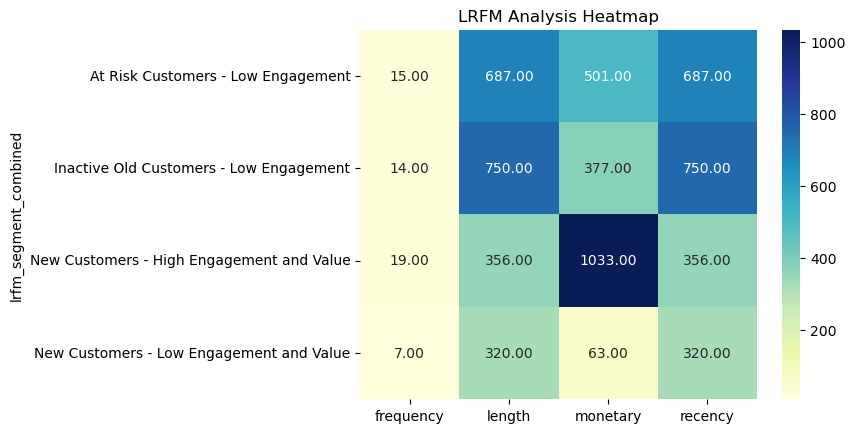

In [347]:
lrfm_heatmap = df_customer.pivot_table(index='lrfm_segment_combined', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

In [348]:
color_map = {
    'New Customers - Low Engagement and Value' : 'blue',
    'New Customers - High Engagement and Value' : 'pink',
    'Inactive Old Customers - Low Engagement' : 'red',
    'At Risk Customers - Low Engagement' : 'yellow',
    'Old Customers - Need Attention' : 'green',
    'Loyal Customers - High Engagement and Value' : 'gray',
    'Potential Loyal Customers - High Value, Low Engagement' : 'purple',
    'Reactivated Customers - Returning with Low Engagement' : 'orange',
}

fig = px.scatter_3d(
    df_customer, 
    x='recency', 
    y='frequency', 
    z='monetary',
    color='lrfm_segment_combined', 
    color_discrete_map=color_map, 
)
                          
fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

# Append LRFM Features to Main Dataset

this is a crucial step in order to be carry out the LRFM analysis, along with all the features in the main dataset.

In [349]:
df = pd.merge(df, df_customer, on='customer_id')
df.head()

,customer_id,year_of_birth,age,education,marital_status,income,num_kids,num_teens,total_kids,date_joined,days_since_joined,days_since_last_purchase,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_products,total_spent,num_deal_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,purchase_frequency,accepted_cmp_1,accepted_cmp_2,accepted_cmp_3,accepted_cmp_4,accepted_cmp_5,accepted_cmp_6,total_accepted_cmp,complained,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
0,5524,1957,57,Postgraduate,Single,58138.0,0,0,0,2012-04-09,972,58,635,88,546,172,88,88,1617,3,8,10,4,7,23,0,0,0,0,0,1,1,0,972,972,23,1617,4,1,1,4,4114,At Risk Customers - Low Engagement
1,2174,1954,60,Postgraduate,Single,46344.0,1,1,2,2014-08-03,126,38,11,1,6,2,1,6,27,2,1,1,2,5,5,0,0,0,0,0,0,0,0,126,126,5,27,1,4,4,1,1441,New Customers - Low Engagement and Value
2,4141,1965,49,Postgraduate,Relationship,71613.0,0,0,0,2013-08-21,473,26,426,49,127,111,21,42,776,1,8,2,10,4,21,0,0,0,0,0,0,0,0,473,473,21,776,2,3,1,3,2313,New Customers - High Engagement and Value
3,6182,1984,30,Postgraduate,Relationship,26646.0,1,0,1,2014-10-02,66,26,11,4,20,10,3,5,53,2,2,0,4,6,7,0,0,0,0,0,0,0,0,66,66,7,53,1,4,4,1,1441,New Customers - Low Engagement and Value
4,5324,1981,33,Postgraduate,Relationship,58293.0,1,0,1,2014-01-19,322,94,173,43,118,46,27,15,422,5,5,3,6,5,15,0,0,0,0,0,0,0,0,322,322,15,422,1,4,2,3,1423,New Customers - High Engagement and Value


In [350]:
df['lrfm_segment_combined'].unique()

array(['At Risk Customers - Low Engagement',
       'New Customers - Low Engagement and Value',
       'New Customers - High Engagement and Value',
       'Inactive Old Customers - Low Engagement'], dtype=object)

# Pivot Tables

The pivot tables below is used in creating one of the visualizations need in the Dashboard for this project created with Tableau.

In [351]:
campaign_df = df.melt(
    id_vars='customer_id', 
    value_vars=[
        'accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3',
        'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_6'
    ],
    var_name='campaign',
    value_name='accepted'
)

In [352]:
campaign_df

,customer_id,campaign,accepted
0,5524,accepted_cmp_1,0
1,2174,accepted_cmp_1,0
2,4141,accepted_cmp_1,0
3,6182,accepted_cmp_1,0
4,5324,accepted_cmp_1,0
...,...,...,...
13285,10870,accepted_cmp_6,0
13286,4001,accepted_cmp_6,0
13287,7270,accepted_cmp_6,0
13288,8235,accepted_cmp_6,0


# Export Dataset

The dataset needs to be exported in order to use it in Tableau.

In [353]:
df.to_csv('supermarket_customers_lrfm.csv', index=False)

In [354]:
campaign_df.to_csv("campaign_unpivoted.csv", index=False)

# Exploratory Data Analysis (EDA)

## Univariate Analysis

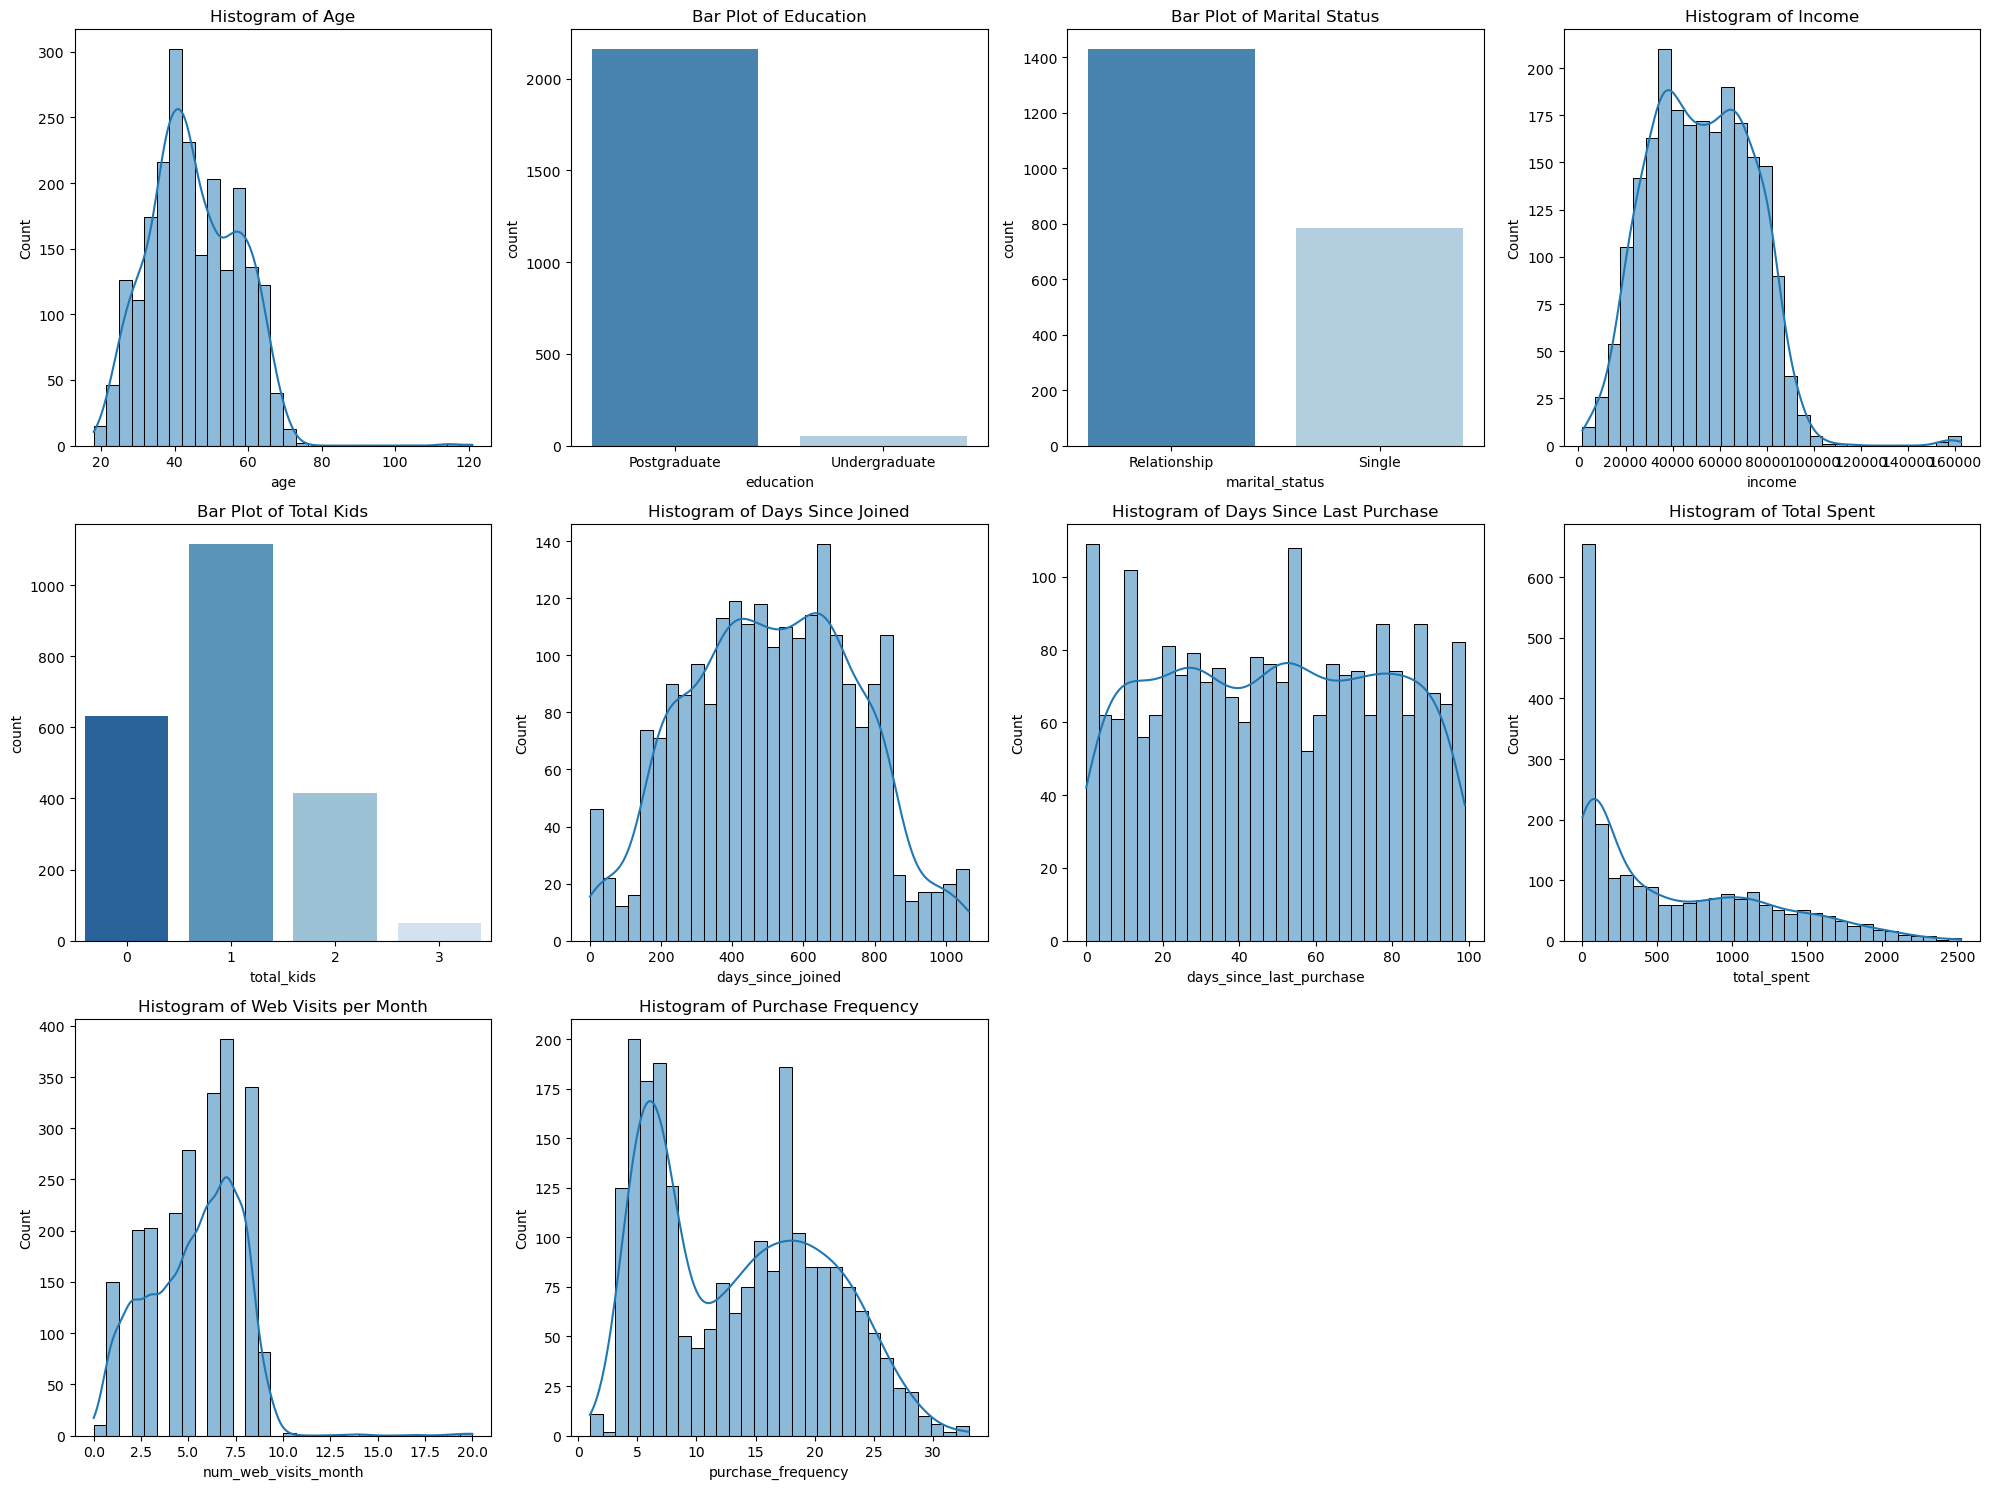

In [355]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# For iteration
axes = axes.flatten()

# Histogram of Age
sns.histplot(df['age'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Histogram of Age')

# Bar plot of Education
sns.countplot(x='education', data=df, ax=axes[1], palette='Blues_r')
axes[1].set_title('Bar Plot of Education')

# Bar plot of Marital Status
sns.countplot(x='marital_status', data=df, ax=axes[2], palette='Blues_r')
axes[2].set_title('Bar Plot of Marital Status')

# Histogram of Income
sns.histplot(df['income'], bins=30, ax=axes[3], kde=True)
axes[3].set_title('Histogram of Income')

# Bar plot of Total Kids
sns.countplot(x='total_kids', data=df, ax=axes[4], palette='Blues_r')
axes[4].set_title('Bar Plot of Total Kids')

# Histogram of Days Since Joined
sns.histplot(df['days_since_joined'], bins=30, ax=axes[5], kde=True)
axes[5].set_title('Histogram of Days Since Joined')

# Histogram of Days Since Last Purchase
sns.histplot(df['days_since_last_purchase'], bins=30, ax=axes[6], kde=True)
axes[6].set_title('Histogram of Days Since Last Purchase')

# Histogram of Total Spent
sns.histplot(df['total_spent'], bins=30, ax=axes[7], kde=True)
axes[7].set_title('Histogram of Total Spent')

# Histogram of Web Visits per Month
sns.histplot(df['num_web_visits_month'], bins=30, ax=axes[8], kde=True)
axes[8].set_title('Histogram of Web Visits per Month')

# Histogram of Purchase Frequency
sns.histplot(df['purchase_frequency'], bins=30, ax=axes[9], kde=True)
axes[9].set_title('Histogram of Purchase Frequency')

# Hide empty subplots
for i in range(10, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [356]:
df['num_web_visits_month'].describe().apply(lambda x: round(x))

count    2215
mean        5
std         2
min         0
25%         3
50%         6
75%         7
max        20
Name: num_web_visits_month, dtype: int64

## Bivariate and Multivariate Analysis

### Analysis of Product Categories

In [357]:
product_categories = [
    'mnt_wines',
    'mnt_fruits',
    'mnt_meat_products',
    'mnt_fish_products',
    'mnt_sweet_products',
    'mnt_gold_products'
]

total_spending = df[product_categories].sum().reset_index()
total_spending.columns = ['Product Category', 'Total Spending']
total_spending = total_spending.sort_values(by='Total Spending', ascending=False)

total_spending

,Product Category,Total Spending
0,mnt_wines,676074
2,mnt_meat_products,370045
5,mnt_gold_products,97415
3,mnt_fish_products,83397
4,mnt_sweet_products,59895
1,mnt_fruits,58391


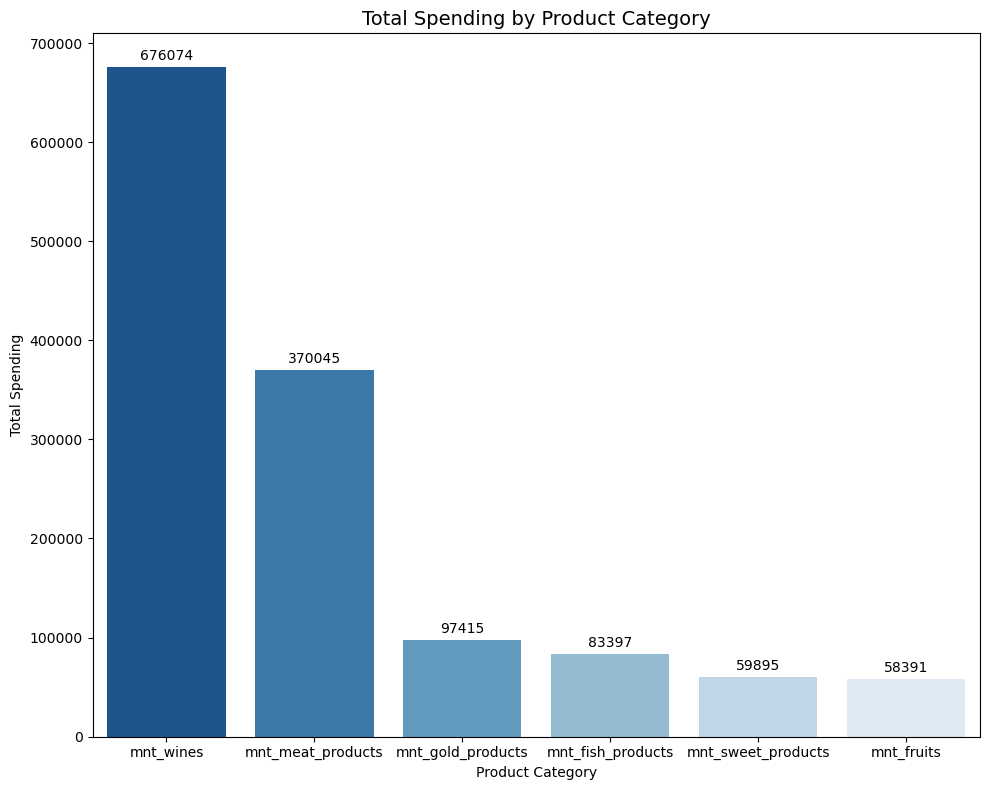

In [358]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=total_spending, x='Product Category', y='Total Spending', palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.title('Total Spending by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

From the graph above, we can see that two of the most in demand categories is wine and meat products. this should be the focus of the marketing team.

### Analysis of LRFM Segments

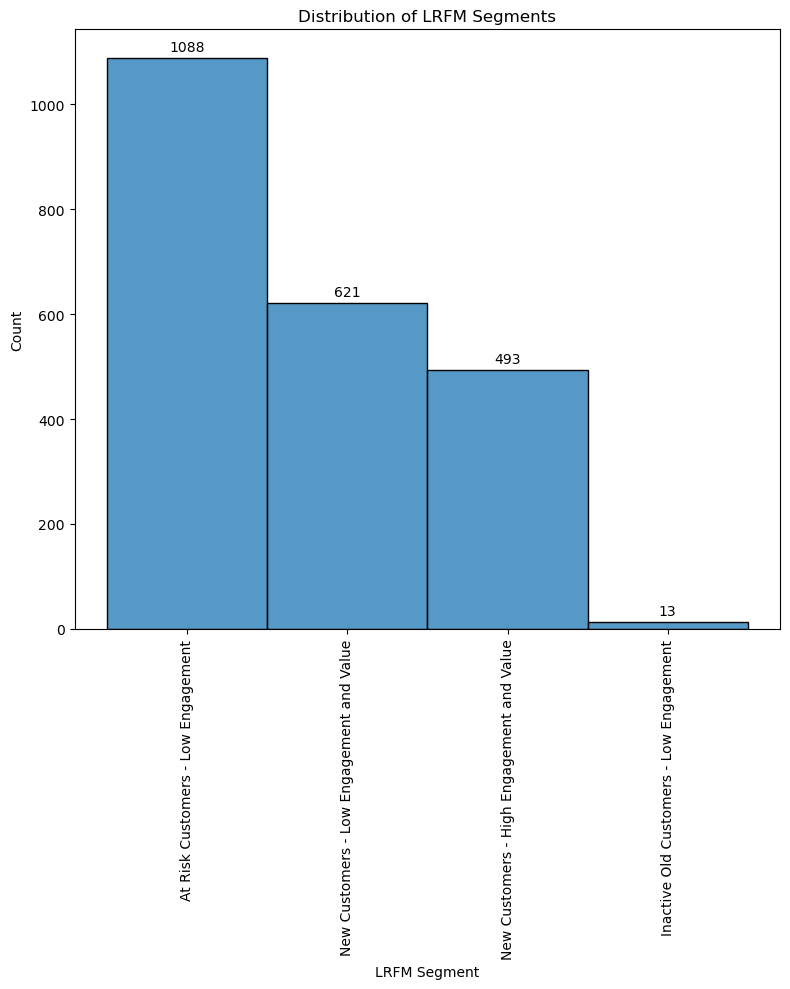

In [359]:
plt.figure(figsize=(8, 10))

ax = sns.histplot(df['lrfm_segment_combined'], palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.xticks(rotation=90)
plt.title('Distribution of LRFM Segments')
plt.xlabel('LRFM Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Average Customer Metrics by LRFM Segment

In [360]:
grouped_df = round(df.groupby('lrfm_segment_combined').mean(), 2).drop('customer_id', axis=1)

grouped_df = grouped_df.reset_index()

transposed = grouped_df.T
transposed

,0,1,2,3
lrfm_segment_combined,At Risk Customers - Low Engagement,Inactive Old Customers - Low Engagement,New Customers - High Engagement and Value,New Customers - Low Engagement and Value
year_of_birth,1969.3,1965.69,1966.47,1969.89
age,44.7,48.31,47.53,44.11
income,51677.88,40471.31,70436.55,38061.79
num_kids,0.42,0.38,0.12,0.74
num_teens,0.5,0.62,0.47,0.53
total_kids,0.92,1.0,0.59,1.27
days_since_joined,706.87,768.38,328.03,314.61
days_since_last_purchase,49.78,35.15,47.55,49.16
mnt_wines,347.12,194.69,535.92,50.99


### LRFM Cluster Analysis

In [361]:
clusters_details = {}

for cluster in df['lrfm_segment_combined'].unique():
    clusters_details[str(cluster)] = {}
    
    for column in df.columns[:2]:
        column_results = dict(
            round(
                df[df['lrfm_segment_combined'] == cluster][column].value_counts(normalize=True),
                2
            )
        )
        
        clusters_details[str(cluster)][column] = column_results

In [362]:
numCols = [
    'age', 'income', 'num_kids', 'days_since_joined', 'recency',
    'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products',
    'total_spent', 'num_deal_purchases', 'num_web_purchases', 'num_catalog_purchases',
    'num_store_purchases', 'num_web_visits_month', 'total_accepted_cmp'
]

In [363]:
catCols = ['education', 'marital_status']

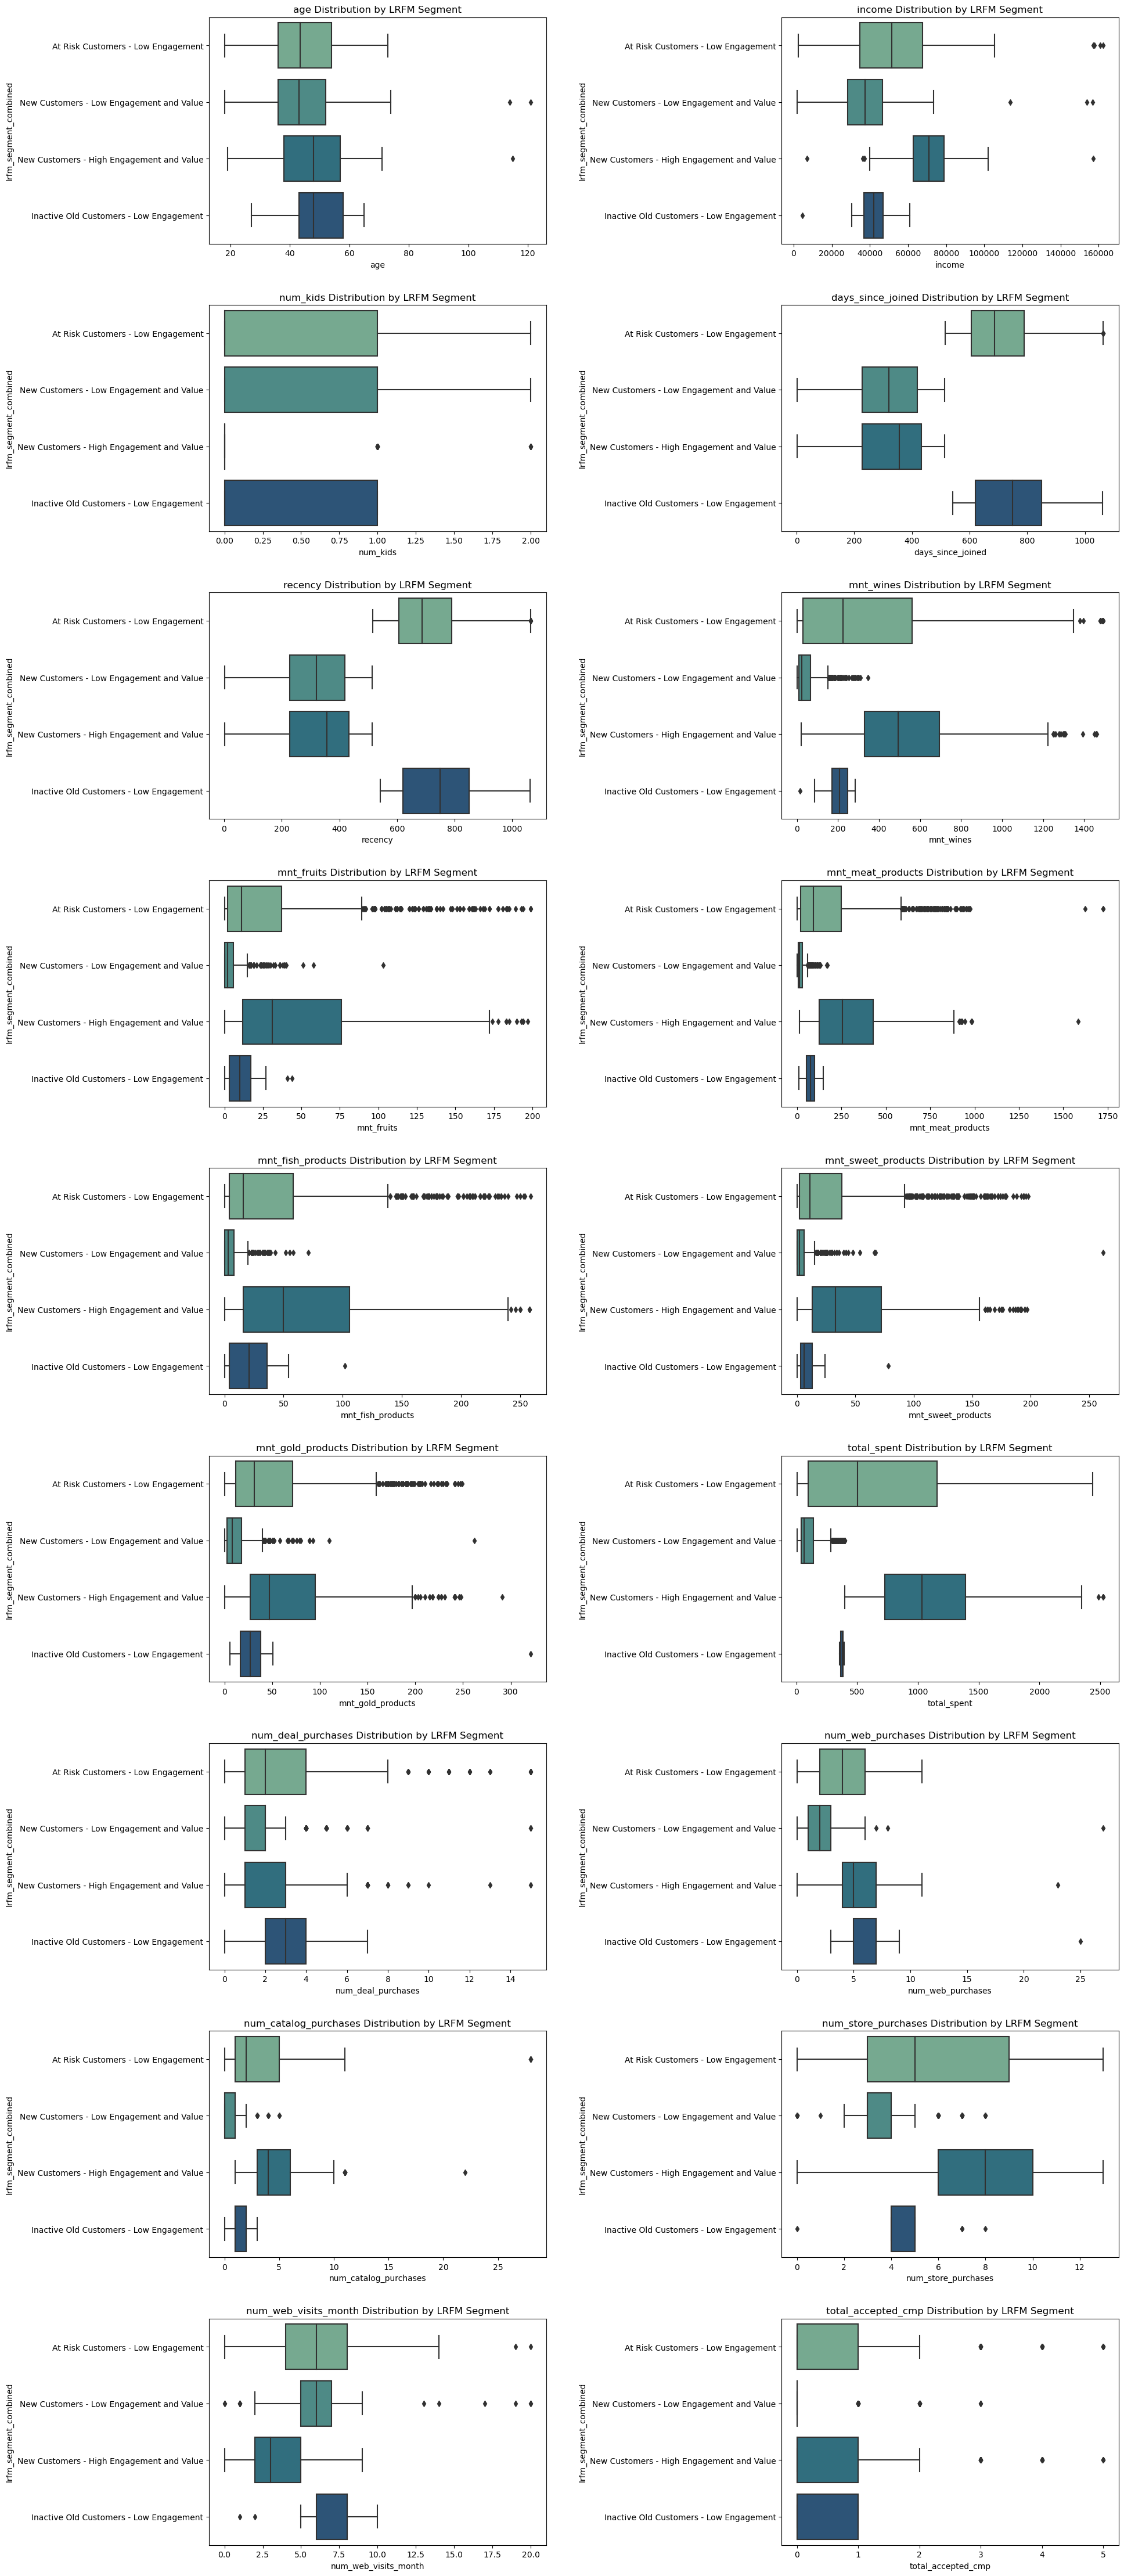

In [364]:
# Calculate number of rows needed, for 2 plots per row
n_cols = 2
n_rows = (len(numCols) + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# For iteration
axs = axs.flatten()

for i, col in enumerate(numCols):
    sns.boxplot(
        y=df['lrfm_segment_combined'],
        x=df[col],
        palette='crest',
        orient='h',
        ax=axs[i]
    )
    axs[i].set_title(f'{col} Distribution by LRFM Segment')
    axs[i].set_xlabel(col)
    
# Hide unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout(pad=3, w_pad=4, h_pad=3)
plt.show()

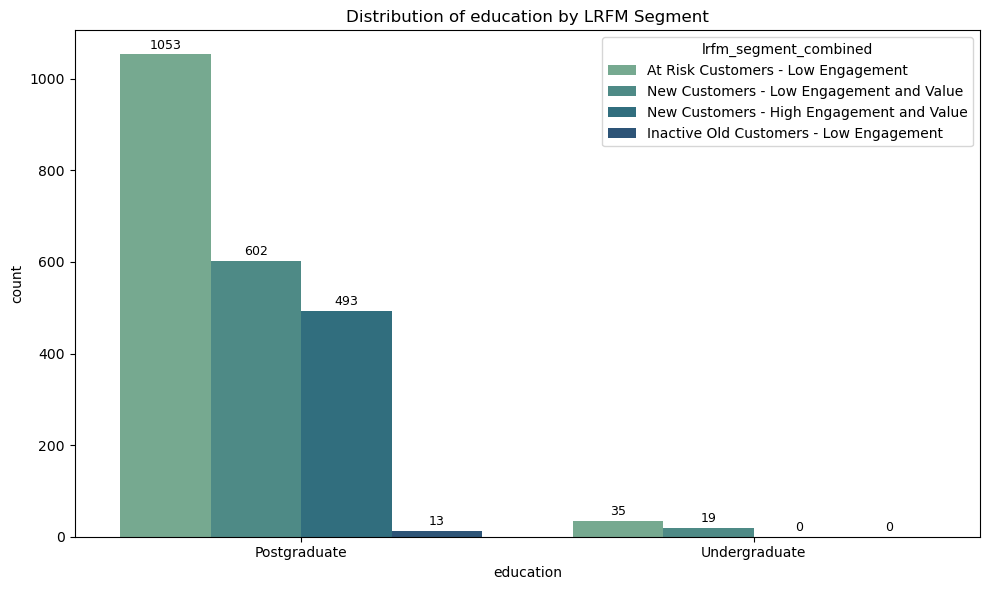

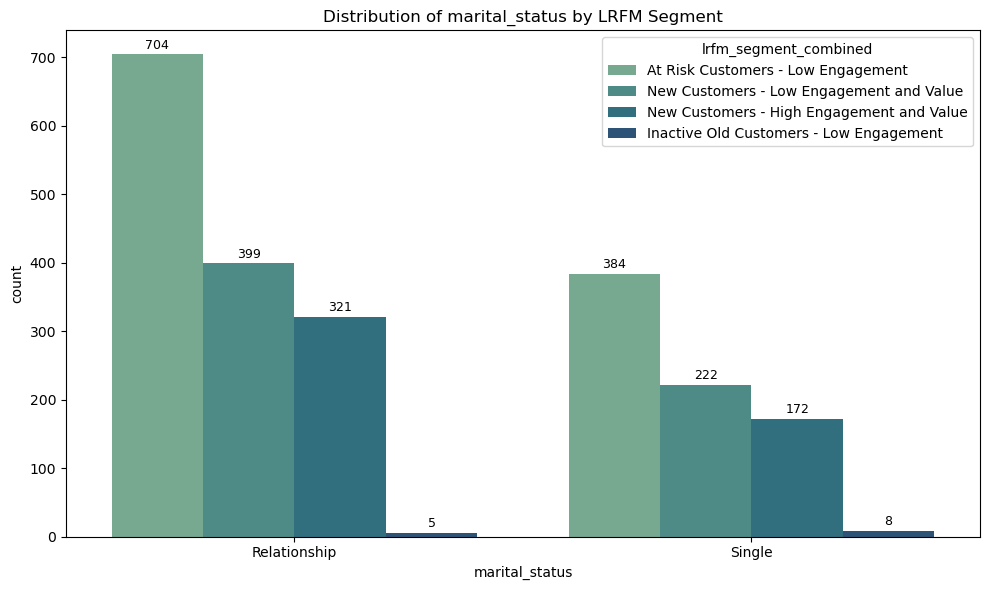

In [365]:
for col in catCols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, data=df, hue='lrfm_segment_combined', palette='crest')
    plt.title(f'Distribution of {col} by LRFM Segment')
    plt.tight_layout()

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

    plt.show()


### Analysis of Campaign Acceptances

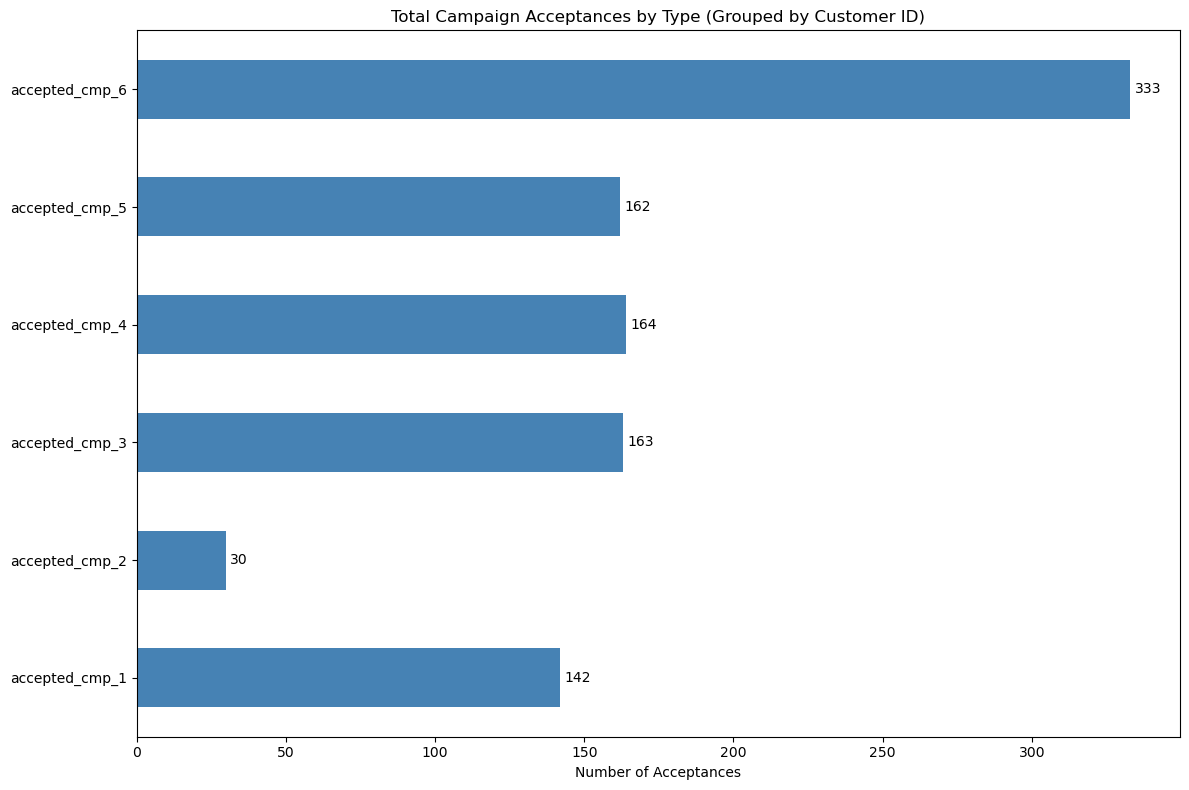

In [366]:
cmpCols = [
    'accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3',
    'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_6'
]

grpByCmp = df.groupby('customer_id')[cmpCols].sum()

acceptance_counts = grpByCmp.sum()

ax = acceptance_counts.plot(kind='barh', figsize=(12, 8), color='steelblue')

ax.bar_label(
    ax.containers[0],
    labels=[f'{int(height)}' for height in acceptance_counts],
    padding=3
)

plt.xlabel("Number of Acceptances")
plt.title("Total Campaign Acceptances by Type (Grouped by Customer ID)")
plt.tight_layout()
plt.show()

### Analysis on Customer Engagement

In [367]:
engagementCols = [
    'purchase_frequency', 'num_web_visits_month', 'num_deal_purchases',
    'num_web_purchases', 'num_store_purchases', 'num_catalog_purchases',
    'total_spent', 'days_since_last_purchase',
    'accepted_cmp_1', 'accepted_cmp_2', 'accepted_cmp_3',
    'accepted_cmp_4', 'accepted_cmp_5', 'accepted_cmp_6', 'complained'
]

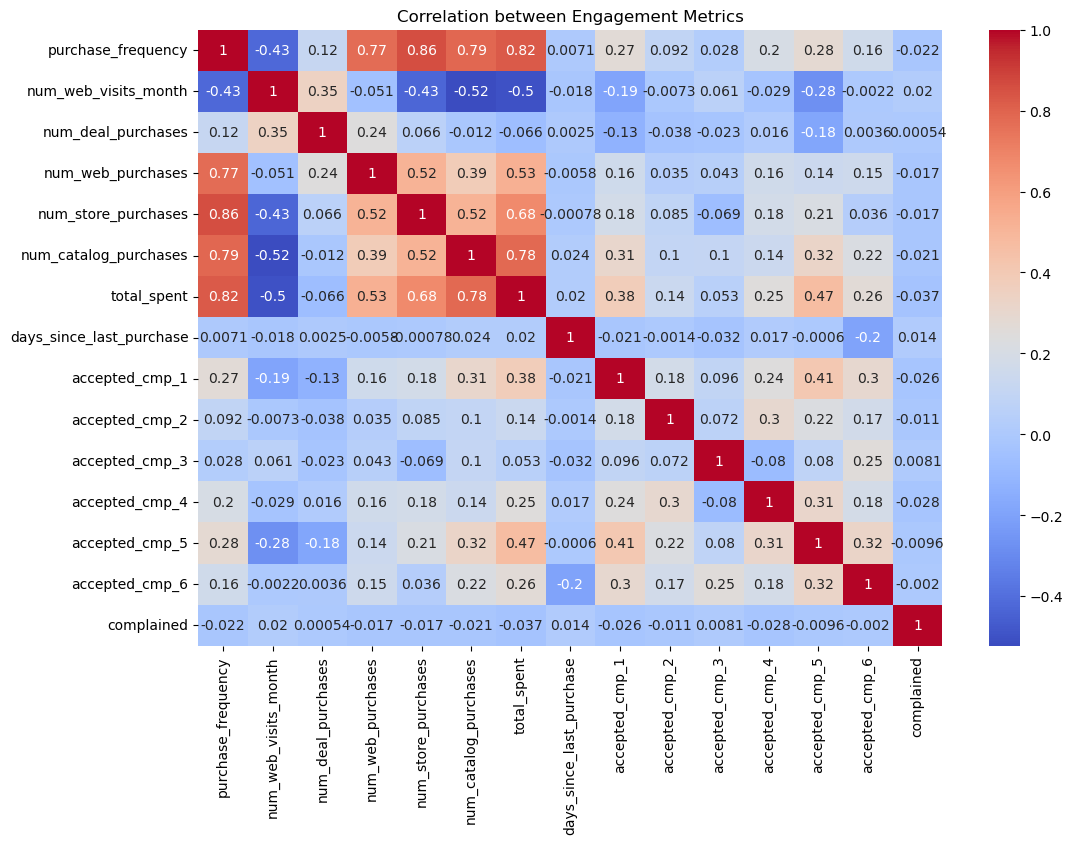

In [368]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[engagementCols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Engagement Metrics')
plt.show()

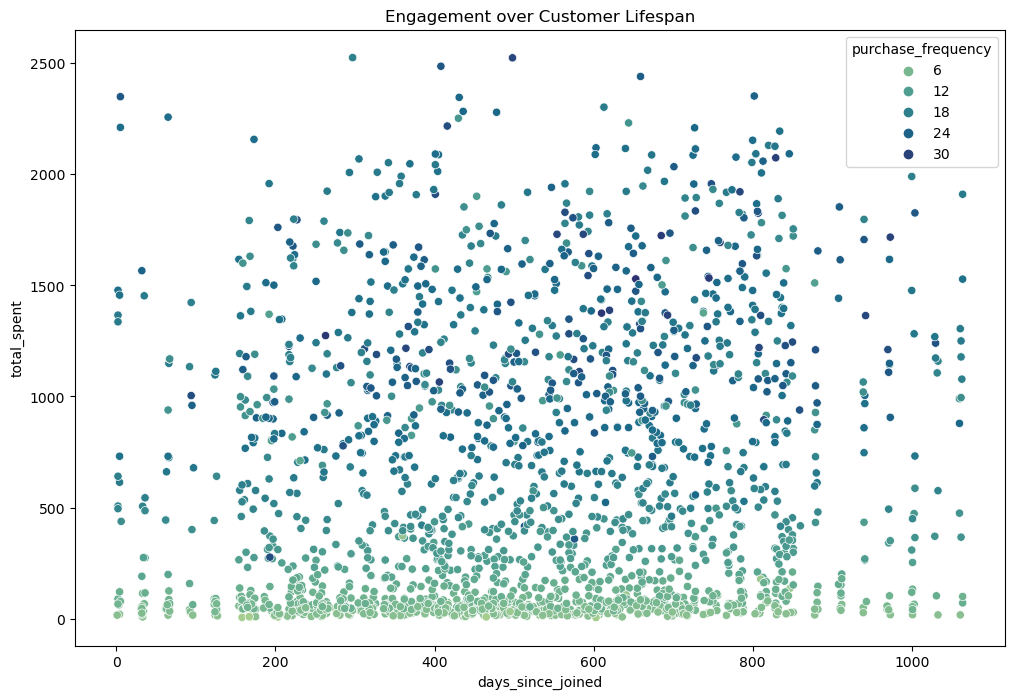

In [369]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='days_since_joined', y='total_spent', data=df, hue='purchase_frequency', palette='crest')
plt.title('Engagement over Customer Lifespan')
plt.show()

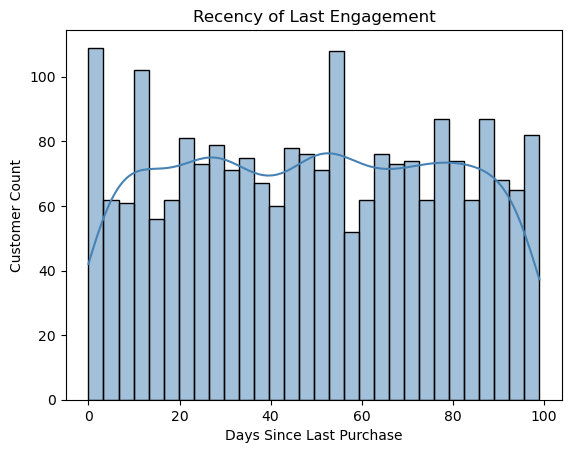

In [370]:
sns.histplot(df['days_since_last_purchase'], bins=30, kde=True, color='steelblue')
plt.title('Recency of Last Engagement')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Customer Count')
plt.show()

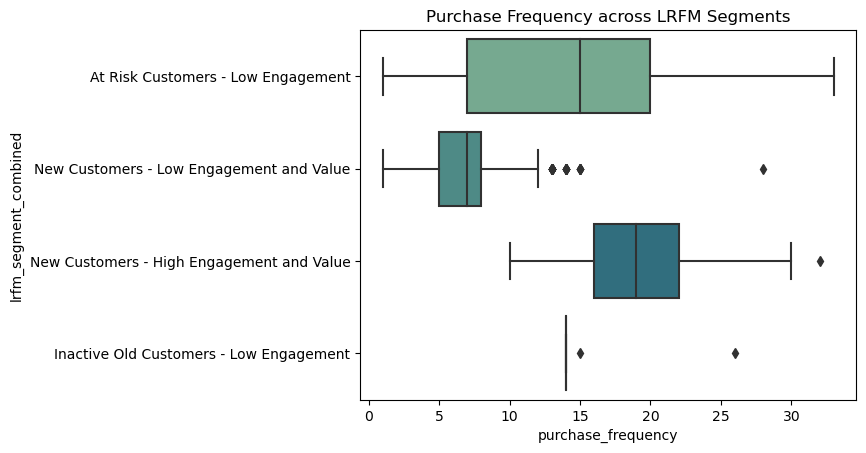

In [371]:
sns.boxplot(x='purchase_frequency', y='lrfm_segment_combined', data=df, palette='crest', orient='h')
plt.title('Purchase Frequency across LRFM Segments')
plt.show()

### `income` vs `total_spent`

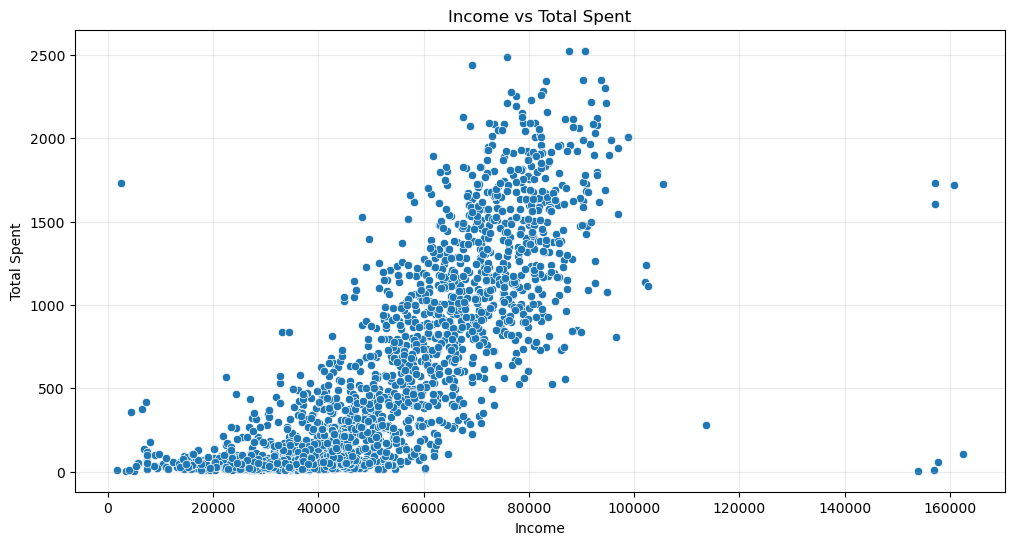

In [372]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='income', y='total_spent', data=df)
plt.title('Income vs Total Spent')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.grid(True, alpha=0.25)
plt.show()

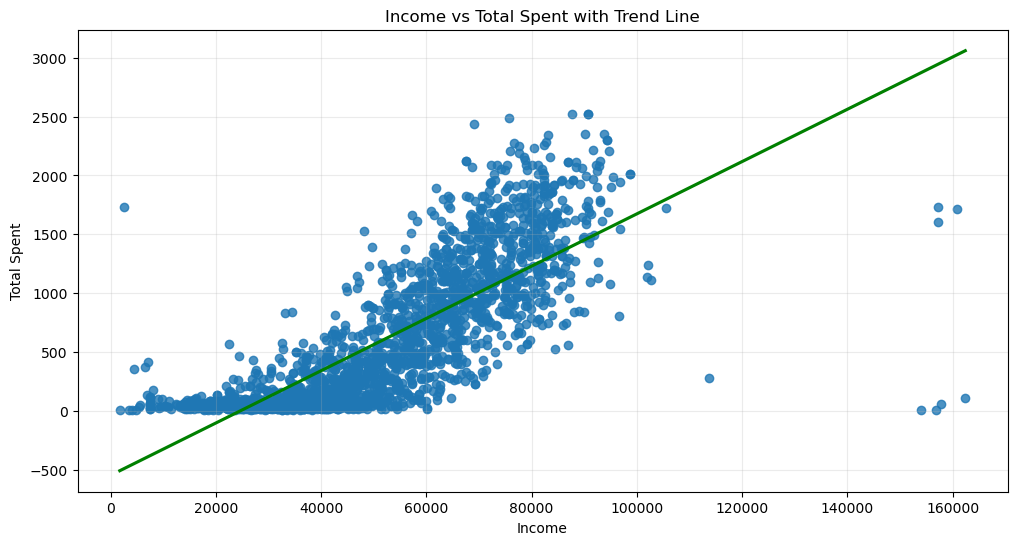

In [373]:
plt.figure(figsize=(12, 6))
sns.regplot(x='income', y='total_spent', data=df, scatter=True, ci=None, line_kws={'color': 'green'})
plt.title('Income vs Total Spent with Trend Line')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.grid(True, alpha=0.25)
plt.show()

In [374]:
correlation = df['income'].corr(df['total_spent'])
print(f"Correlation between Income and Total Spent: {correlation:.2f}")

Correlation between Income and Total Spent: 0.79


Insight on `income` vs `total_spent`

- When income goes up, spending goes up too — almost all the time.

- The relationship is strong, but not perfect

### `income` vs `total_spent` by `total_kids`

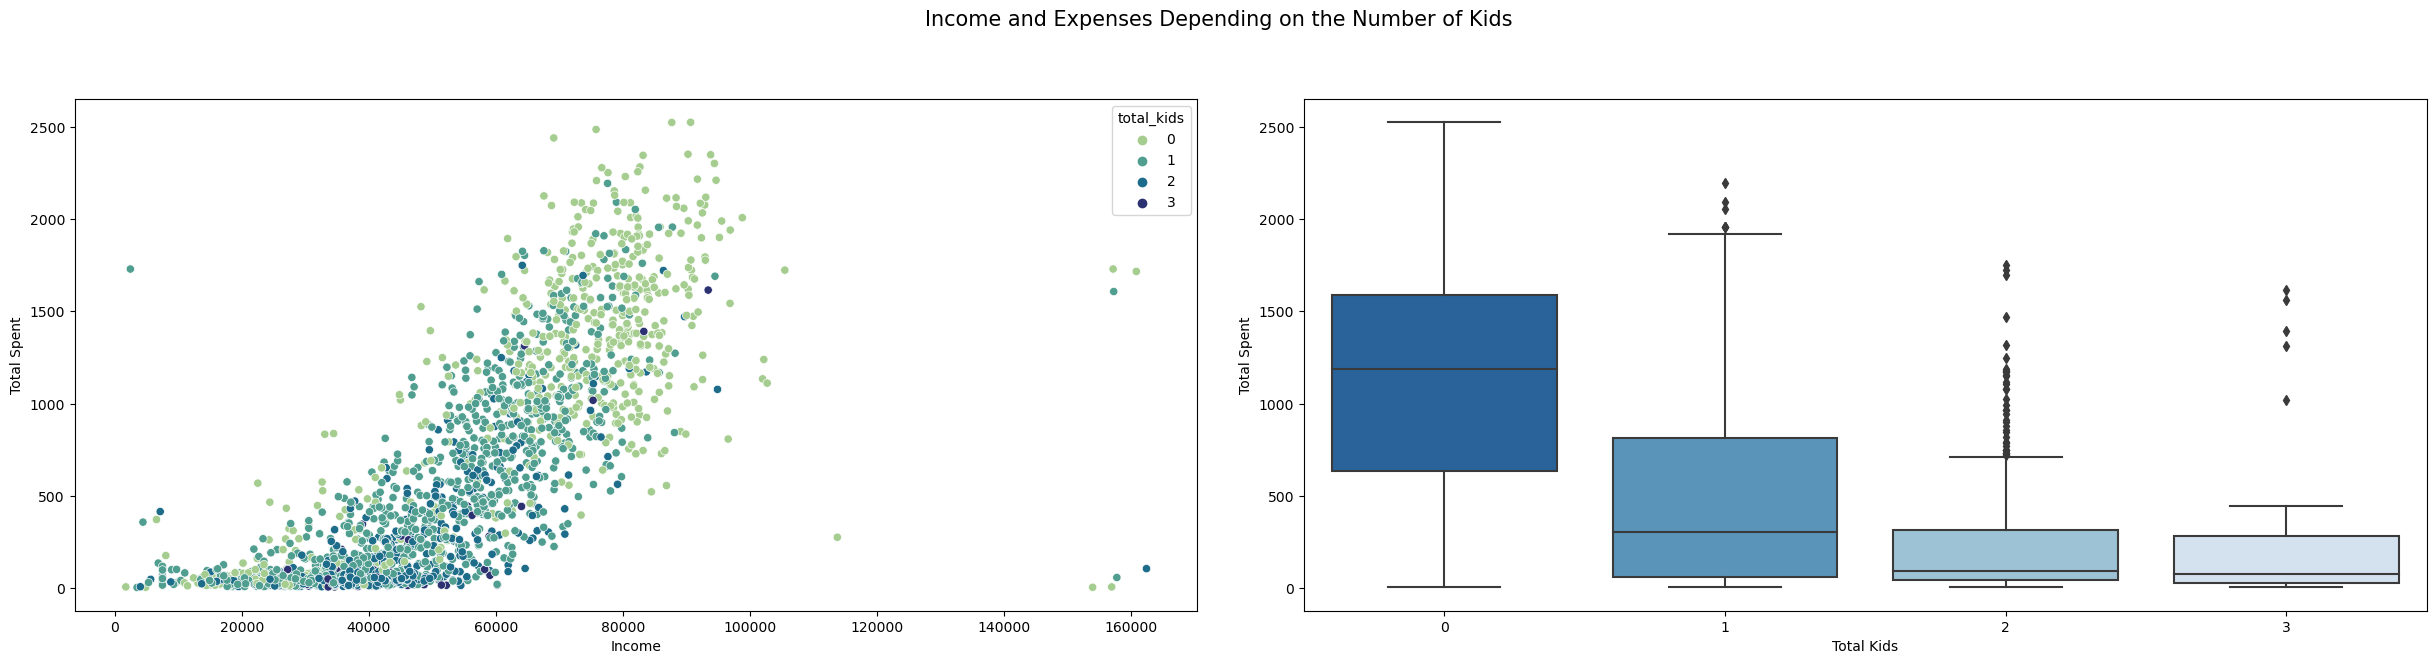

In [375]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

fig.suptitle('Income and Expenses Depending on the Number of Kids', fontsize=15)

sns.scatterplot(
    x='income',
    y='total_spent',
    data=df,
    hue='total_kids',
    palette='crest',
    ax=ax1
)
ax1.set_xlabel('Income')
ax1.set_ylabel('Total Spent')

sns.boxplot(
    x='total_kids',
    y='total_spent',
    data=df,
    palette='Blues_r',
    ax=ax2
)
ax2.set_xlabel('Total Kids')
ax2.set_ylabel('Total Spent')

plt.tight_layout(pad=3.0)
plt.show()

### `income` vs `total_spent` by `marital_status`

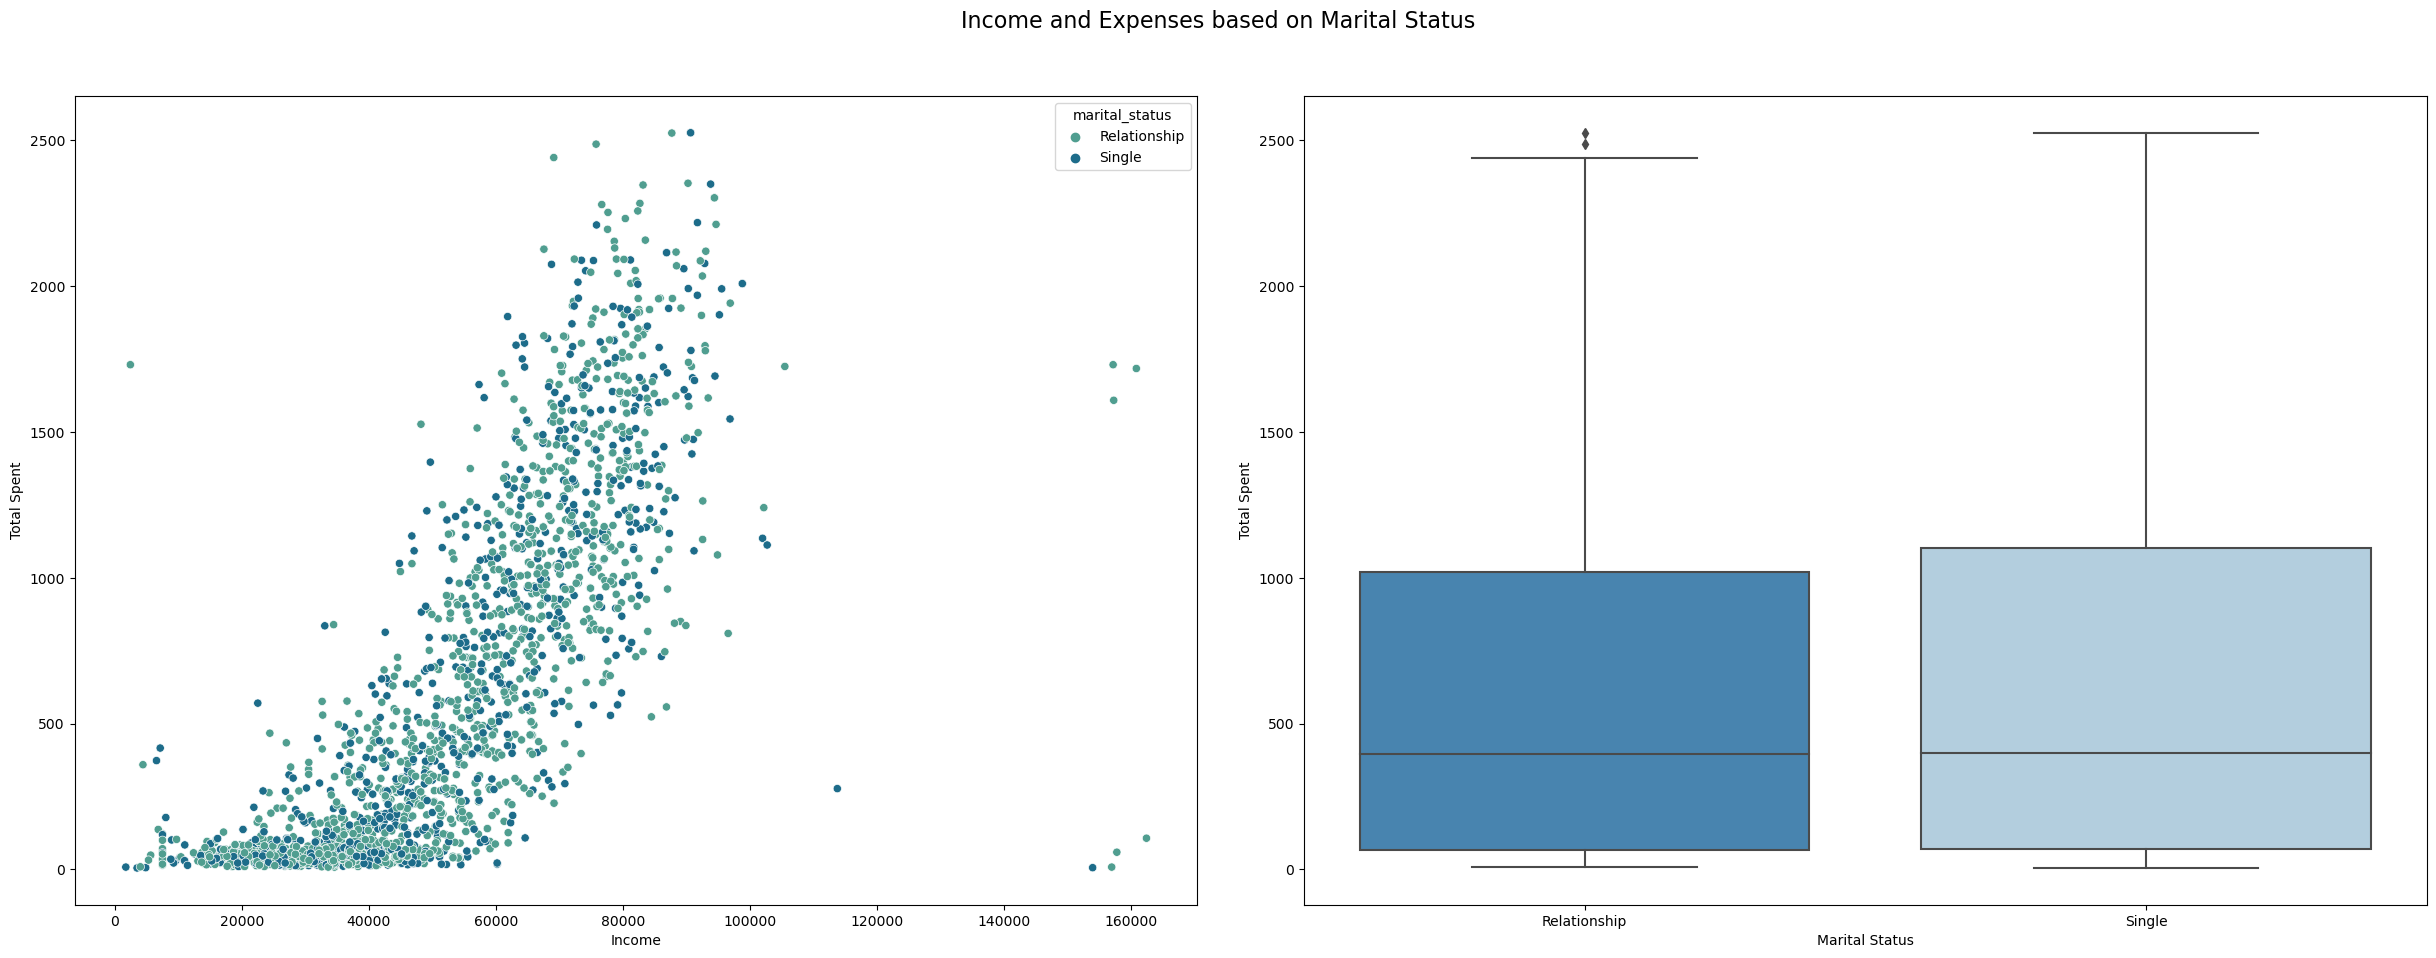

In [376]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle('Income and Expenses based on Marital Status', size=16)

sns.scatterplot(
    x='income',
    y='total_spent',
    data=df,
    hue='marital_status',
    palette='crest',
    ax=ax1
)
ax1.set_xlabel('Income')
ax1.set_ylabel('Total Spent')

sns.boxplot(
    x='marital_status',
    y='total_spent',
    data=df,
    palette='Blues_r',
    ax=ax2
)
ax2.set_xlabel('Marital Status')
ax2.set_ylabel('Total Spent')

plt.tight_layout(pad=3.0)
plt.show()

### `days_since_joined` vs `education`

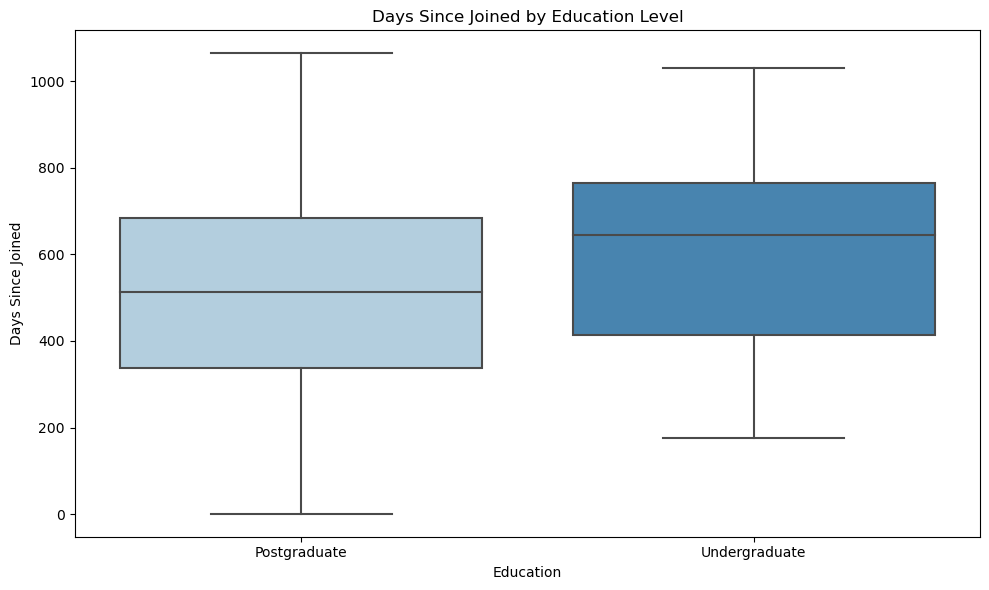

In [377]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='days_since_joined', data=df, palette='Blues')
plt.title('Days Since Joined by Education Level')
plt.xlabel('Education')
plt.ylabel('Days Since Joined')
plt.tight_layout()
plt.show()

In [378]:
from scipy.stats import kruskal

groups = [group['days_since_joined'].values for _, group in df.groupby('education')]
stat, p = kruskal(*groups)
print(f'Kruskal-Wallis H-statistic: {stat:.2f}, p-value: {p:.4f}')

Kruskal-Wallis H-statistic: 7.62, p-value: 0.0058


### `total_kids` vs `total_spent`

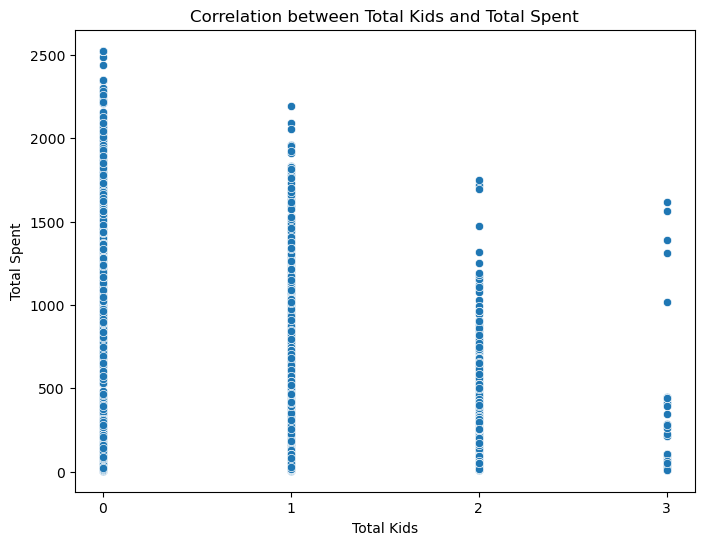

In [379]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_kids', y='total_spent', data=df)
plt.title('Correlation between Total Kids and Total Spent')
plt.xticks([0, 1, 2, 3])
plt.xlabel('Total Kids')
plt.ylabel('Total Spent')
plt.show()


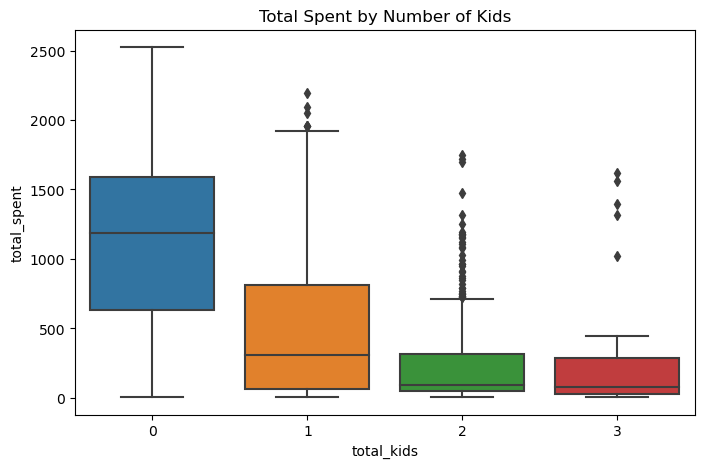

In [380]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='total_kids', y='total_spent', data=df)
plt.title('Total Spent by Number of Kids')
plt.show()

In [381]:
correlation = df['total_kids'].corr(df['total_spent'])
print(f"Correlation between total_kids and total_spent: {correlation:.2f}")

Correlation between total_kids and total_spent: -0.50


<Axes: xlabel='total_kids', ylabel='total_spent'>

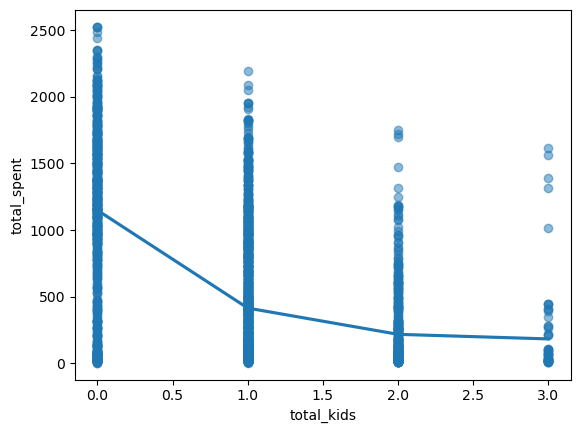

In [382]:
sns.regplot(x='total_kids', y='total_spent', data=df, lowess=True, scatter_kws={'alpha':0.5})

Insight on `total_kids` vs `total_spent`
- As the kid-count goes up, the spending tends to go down.

- People with more kids might be more budget-conscious.

- They might spread spending across more necessities.

- Or they could be buying cheaper items or shopping elsewhere.

# Conclusion and Recommendations

## Conclusion

1. **Customer Segmentation (LRFM Analysis):**
    - The LRFM analysis was used to segment customers into groups/clusters based on their Length, Recency, Frequency, and Monetary scores.
    - Although there were 8 segments created, only 4 key segments were identified.
    - Those 4 segments are:
      - **Old Customers**: Loyal customers who have been active for a long time, contributing significant contribution to revenue.
      - **At Risk Customers**: Low engagement, requiring attention to prevent churn.
      - **New Customers**: Segmented into low and high engagement/value groups, indicating potential for growth.
      - **Inactive Old Customers**: Low engagement and value, with minimal contribution to revenue.

2. **Product Preferences:**
    - The most in-demand product categories are **Wine** and **Meat Products**, contributing the highest to total spending.
    - Other categories like **Fruits**, **Fish Products**, and **Gold Products** have lower demand but potential opportunity for targeted marketing.

3. **Campaign Effectiveness:**
    - Campaign acceptance rates are generally low, with **Campaign 6** showing slightly higher acceptance compared to others.
    - This indicates a need to improve campaign strategies to better align with customer preferences and behaviors.

4. **Customer Engagement:**
    - Customers with higher purchase frequency and total spending tend to have shorter recency periods, indicating active engagement.
    - Web visits and catalog purchases show a moderate correlation with total spending, suggesting these channels are effective for driving sales.

5. **Demographic Insights:**
    - Income positively correlates with total spending, but the relationship is not perfect, indicating other factors influence spending behavior.
    - Customers with more kids tend to spend less, likely due to budget constraints or different spending priorities.
    - Education and marital status also influence spending and engagement patterns, providing opportunities for tailored marketing.

6. **Customer Retention:**
    - Customers with longer relationships (higher length scores) tend to have higher monetary contributions, emphasizing the importance of retention strategies.
    - Recency analysis highlights the need to re-engage customers who haven't made recent purchases.

## Recommendations

1. **Targeted Marketing Campaigns:**
    - Focus on **Loyal Customers** who have contributed a lot, to maintain their engagement and value.
    - Develop reactivation campaigns for **At Risk** and **Inactive Old Customers** to prevent churn.
    - Utilize up-selling and cross-selling strategies to **New Customers** with high engagement and potential value.

2. **Product Promotions:**
    - Prioritize promotions for **Wines** and **Meat Products**, as they are the most popular categories.
    - Explore opportunities to boost sales in underperforming categories like **Fruits** and **Gold Products**.

3. **Campaign Optimization:**
    - Analyze the success factors of **Campaign 6** and replicate them in future campaigns.
    - Personalize campaigns based on customer segments and preferences to improve acceptance rates.

4. **Engagement Channels:**
    - Leverage web and catalog channels to drive sales, as they show a positive correlation with spending.
    - Enhance the online shopping experience to encourage repeat purchases.

5. **Demographic-Specific Strategies:**
    - Tailor marketing messages for customers with kids, focusing on value and affordability.
    - Use income and education data to design premium offerings for high-income, highly educated customers.

6. **Retention Efforts:**
    - Implement loyalty programs to reward long-term customers and encourage repeat purchases.
    - Use recency data to identify and re-engage customers who haven't purchased recently.

By implementing these strategies, the marketing team can use the insights and data to optimize marketing efforts, enhance customer engagement, boost revenue, and improve overall customer satisfaction. This will eventually lead to long-term customer retention and business growth.